<a href="https://colab.research.google.com/github/YasminGarcia1210/MAESTRIA_DATOS/blob/main/TAREA_2___FUNDAMENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior.

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

# Carga de Paquetes


In [1]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

# carga de Datos

In [2]:
data = pd.read_excel("/content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()



,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


(220, 4)


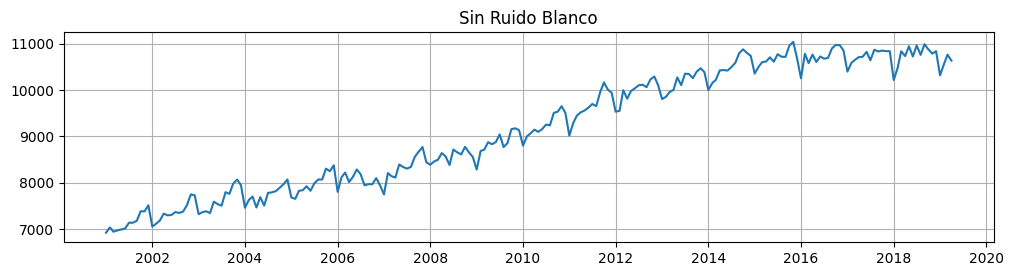

In [3]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
fig = plt.figure(figsize=(12, 6))

plt.subplot(2,1, 1)
plt.title("Sin Ruido Blanco")
plt.ylabel("")
plt.plot(data[["Ocupados"]])
plt.grid()



## **3. Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H_{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H_{1}: ρ \not= 0$ (Es decir si hay autocorrelación)

Rechazo $H_{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).


In [4]:
signo=data.Ocupados>0
runstest_1samp(signo, correction=False) #Correr el test

/usr/local/lib/python3.10/dist-packages/statsmodels/sandbox/stats/runs.py:102: RuntimeWarning: invalid value encountered in scalar divide
  z /= rstd


(nan, nan)

## Quitar la media a la columna (pdte)

In [5]:
# prueba de Box-Pierce y la modificación de Ljung-Box
sm.stats.acorr_ljungbox(data.Ocupados, lags=[1], return_df=True,boxpierce=True ) # Se puede hacer para un solo lag.

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,213.848488,1.987331e-48,210.958644,8.486316e-48


In [6]:
Resul_lb_bp = sm.stats.acorr_ljungbox(data.Ocupados, lags=range(1,7), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,213.848488,1.987331e-48,210.958644,8.486316e-48,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,421.882574,2.451111e-92,415.244368,6.773783e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,625.378784,3.172685e-135,614.157330,8.594402e-133,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,825.355742,2.471383e-177,808.729505,9.873368e-174,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,1021.698974,1.204937e-218,998.881735,1.049496e-213,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,1213.666388,5.275121e-259,1183.931404,1.437450e-252,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr


# Concluir
Con los Valores Obtenidos en el lb value and bp value rechazo la hipotesis Nula, por tanto no hay autocorrelación ☣ ⛪

\### **4. Homoscedasticidad y Heteroscedasticidad**

Ahora nos queda por chequear si existe problemas de heteroscedasticidad, en
especial un comportamiento tipo ARCH o GARCH, esto implica que la varianza de la serie tenga un comportamiento no autocorrelacionado.

Una aproximación para determinar si existe un comportamiento GARCH o
ARCH es emplear la prueba de Ljung-Box sobre la serie (sin media) al cuadrado.

$H{0}:$ Comportamiento Homoscedastico (Es decir varianza constante)

$H{1}:$ Comportamiento Heteroscedastico (Es decir varianza no constante)

In [7]:
sm.stats.acorr_ljungbox((data.Ocupados-data.Ocupados.mean())**2, lags=range(1,7), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,183.983988,6.540417e-42,181.497718,2.282523e-41
2,349.643863,1.190693e-76,344.172730,1.835867e-75
3,500.892842,3.056176e-108,492.015200,2.564874e-106
4,642.578833,9.419447e-138,629.871841,5.304772e-135
5,778.288564,5.754246e-166,761.302436,2.717324e-162
6,904.994860,3.125971e-192,883.442739,1.425870e-187


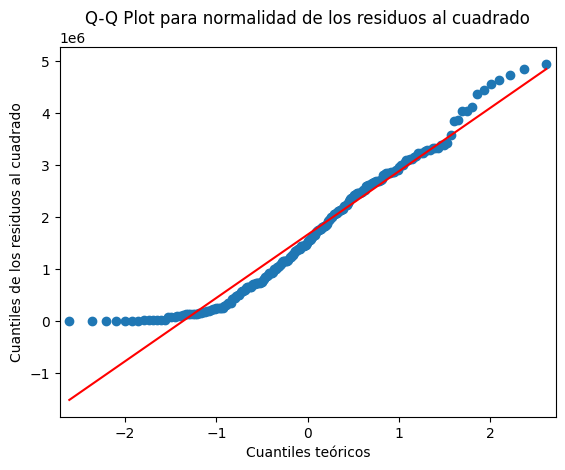

Resultado del test de Ljung-Box:
      lb_stat      lb_pvalue     bp_stat      bp_pvalue
1  183.983988   6.540417e-42  181.497718   2.282523e-41
2  349.643863   1.190693e-76  344.172730   1.835867e-75
3  500.892842  3.056176e-108  492.015200  2.564874e-106
4  642.578833  9.419447e-138  629.871841  5.304772e-135
5  778.288564  5.754246e-166  761.302436  2.717324e-162
6  904.994860  3.125971e-192  883.442739  1.425870e-187


In [8]:
residuos_al_cuadrado = (data.Ocupados - np.mean(data.Ocupados)) ** 2
# Calcular la Q-Q plot
fig = sm.qqplot(residuos_al_cuadrado, line='s')
# Agregar título y etiquetas
plt.title('Q-Q Plot para normalidad de los residuos al cuadrado')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los residuos al cuadrado')
# Mostrar la gráfica
plt.show()
# Realizar el test de Ljung-Box
resultado_ljungbox = sm.stats.acorr_ljungbox(residuos_al_cuadrado, lags=range(1, 7), return_df=True, boxpierce=True)
print("Resultado del test de Ljung-Box:")
print(resultado_ljungbox)

# Modelos

## Tendencia Lineal

In [9]:
data = pd.read_excel("/content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [10]:
y = data["Ocupados"]
x = np.linspace(1,data.shape[0],data.shape[0])
X = sm.add_constant(x)
lin = sm.OLS(y,X)
lin_t = lin.fit()
print(lin_t.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4768.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          3.78e-150
Time:                        20:40:27   Log-Likelihood:                -1543.4
No. Observations:                 220   AIC:                             3091.
Df Residuals:                     218   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6953.2351     36.621    189.870      0.0

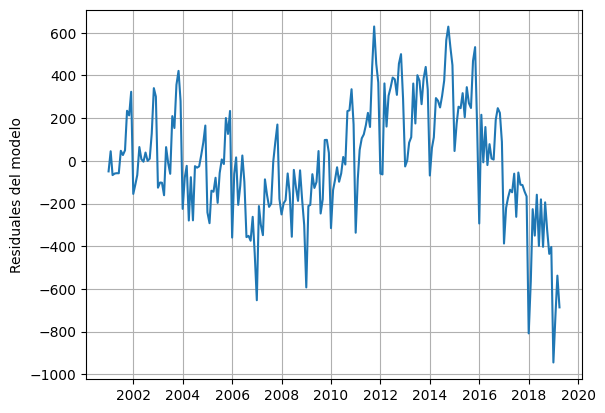

In [11]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

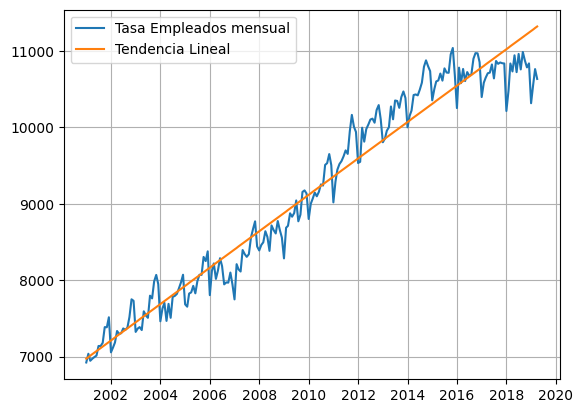

In [12]:
plt.plot(y,label="Tasa Empleados mensual")
plt.plot(lin_t.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

# Descarto el modelo Lineal

In [13]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(x_for)

In [14]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

   Point_forecast      lower_95      upper_95
0    11338.111638  10799.800067  11876.423210
1    11357.952709  10819.575011  11896.330406
2    11377.793779  10839.349368  11916.238190
3    11397.634849  10859.123137  11936.146561
4    11417.475919  10878.896319  11956.055519
5    11437.316989  10898.668914  11975.965064


### Suavización Exponencial Simple

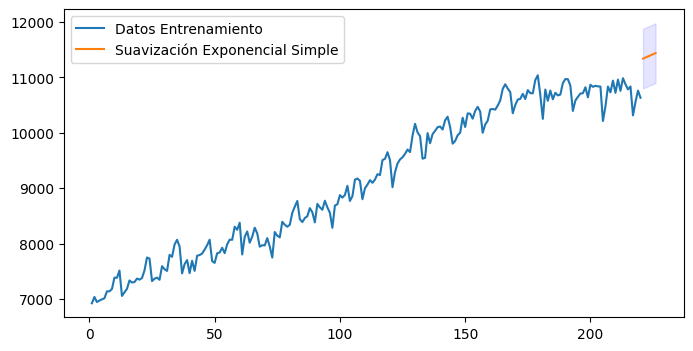

In [15]:
fig = plt.figure(figsize=(8, 4))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

# Tendencia Cuadrática

In [16]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
X = sm.add_constant(data[["x","x2"]])
pol = sm.OLS(y,X) # minimos cuadrados ordinarios
pol_2 = pol.fit()
print(pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2539.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.96e-151
Time:                        20:40:28   Log-Likelihood:                -1536.3
No. Observations:                 220   AIC:                             3079.
Df Residuals:                     217   BIC:                             3089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6800.5016     53.613    126.843      0.0

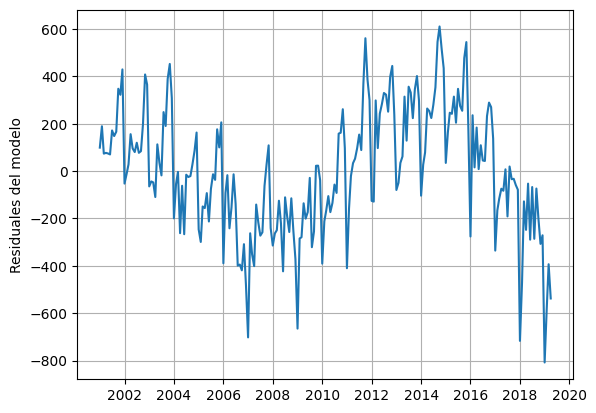

In [17]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_2.resid)
plt.grid()

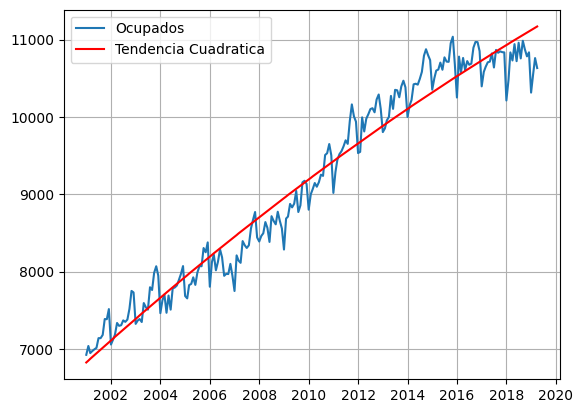

In [18]:
plt.plot(y,label="Ocupados")
plt.plot(pol_2.fittedvalues,label="Tendencia Cuadratica", color='r')
plt.legend()
plt.grid()
plt.show()

In [19]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**2), axis=1))

In [20]:
dt = pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

   Point_forecast      lower_95      upper_95
0    11185.378113  10657.001417  11713.754809
1    11201.072571  10672.306560  11729.838583
2    11216.729673  10687.562292  11745.897054
3    11232.349418  10702.768402  11761.930434
4    11247.931806  10717.924680  11777.938932
5    11263.476837  10733.030914  11793.922760


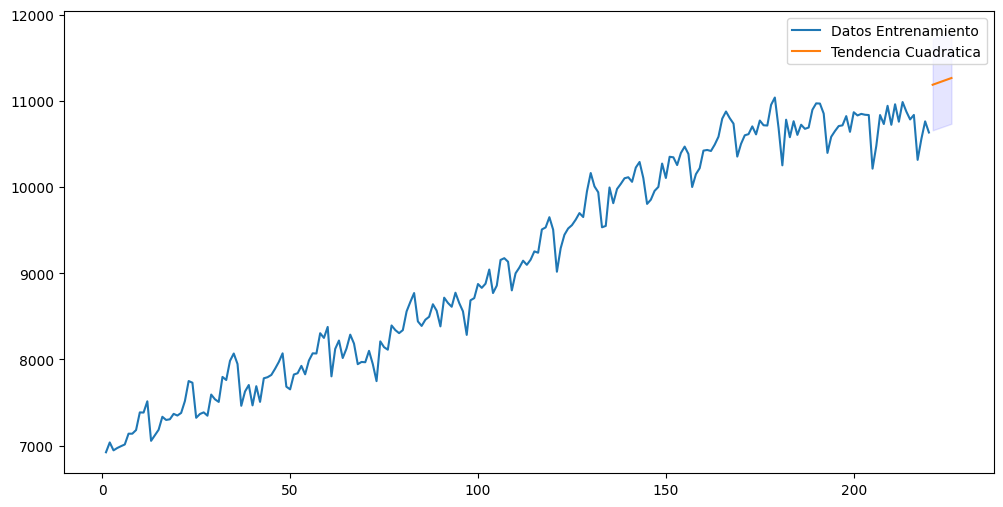

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

# Descarto Modelo Cuadratico

# Modelo polinomial Cubico

In [22]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**5
X = sm.add_constant(data[["x","x2"]])
pol = sm.OLS(y,X) # minimos cuadrados ordinarios
pol_3 = pol.fit()
print(pol_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     3131.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          9.14e-161
Time:                        20:40:31   Log-Likelihood:                -1514.0
No. Observations:                 220   AIC:                             3034.
Df Residuals:                     217   BIC:                             3044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6778.6394     38.631    175.473      0.0

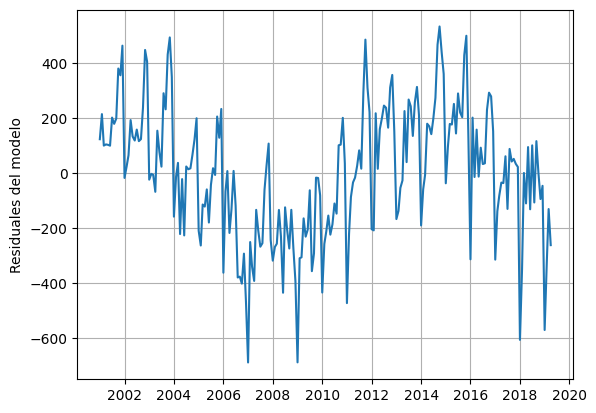

In [23]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_3.resid)
plt.grid()

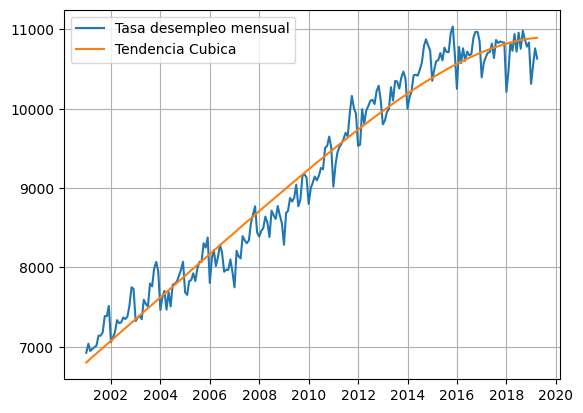

In [24]:
plt.plot(y,label="Tasa desempleo mensual")
plt.plot(pol_3.fittedvalues,label="Tendencia Cubica")
plt.legend()
plt.grid()
plt.show()

In [25]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**3), axis=1))


In [26]:
dt = pol_3.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

   Point_forecast      lower_95      upper_95
0    11816.165966  11329.913369  12302.418563
1    11838.960032  11352.480368  12325.439696
2    11861.754096  11375.045913  12348.462279
3    11884.548158  11397.610006  12371.486310
4    11907.342217  11420.172649  12394.511785
5    11930.136274  11442.733843  12417.538704


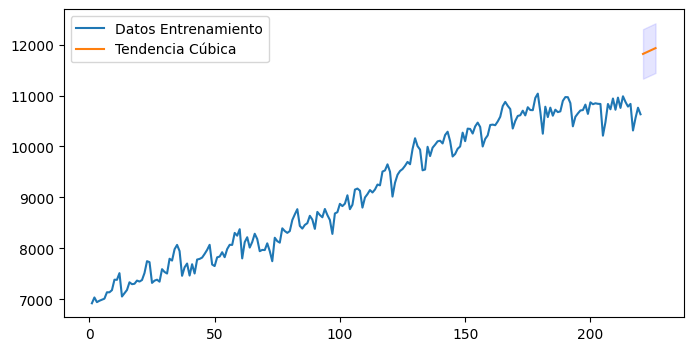

In [27]:
fig = plt.figure(figsize=(8, 4))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia Cúbica")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

# Dumificar Variables

In [28]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)

y = data["Ocupados"]
X = sm.add_constant(month_dummies)
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2787
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.989
Time:                        20:40:34   Log-Likelihood:                -1886.0
No. Observations:                 220   AIC:                             3796.
Df Residuals:                     208   BIC:                             3837.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8808.2176    301.805     29.185      0.0

In [29]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,0,0,0,0,0,0,0,0,0,0,1
2019-01-01,0,0,0,0,0,0,0,0,0,0,0
2019-02-01,1,0,0,0,0,0,0,0,0,0,0


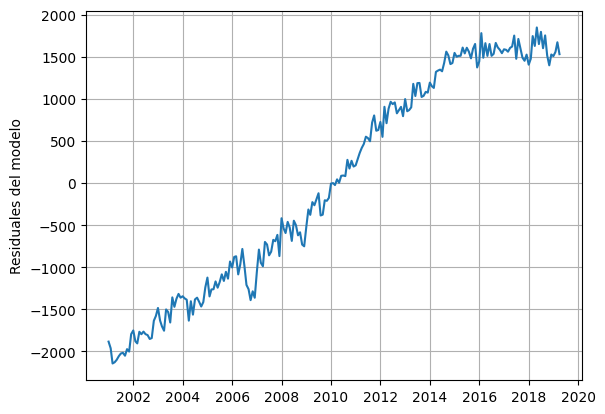

In [30]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

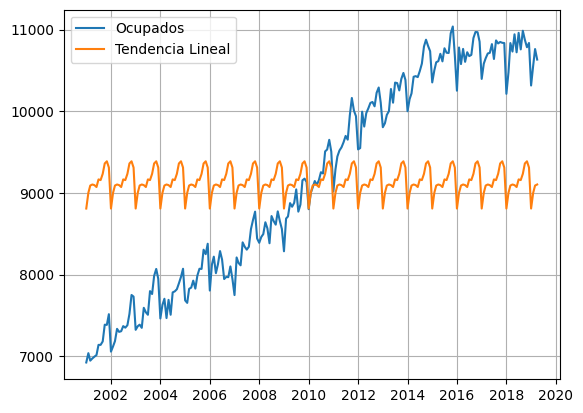

In [31]:
plt.plot(y,label="Ocupados")
plt.plot(season.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [32]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
x_for = pd.get_dummies(range_dates.month,drop_first=True)
X_for= sm.add_constant(x_for)

In [33]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast     lower_95      upper_95
2019-05-01     9095.089000  6430.527026  11759.650974
2019-06-01     9071.789000  6407.227026  11736.350974
2019-07-01     9164.935167  6500.373193  11829.497140
2019-08-01     9156.633500  6492.071526  11821.195474
2019-09-01     9232.988500  6568.426526  11897.550474
2019-10-01     9359.934944  6695.372971  12024.496918
2019-11-01     9386.702222  6722.140249  12051.264196
2019-12-01     9310.332667  6645.770693  11974.894640
2020-01-01     8808.217632  6147.348746  11469.086517
2020-02-01     9001.037684  6340.168799  11661.906569
2020-03-01     9090.037158  6429.168273  11750.906043
2020-04-01     9102.647316  6441.778431  11763.516201


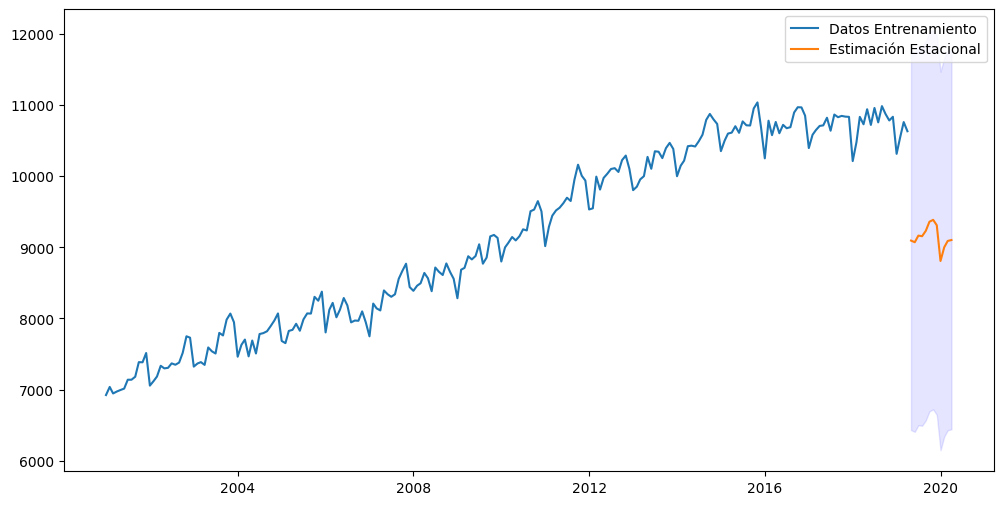

In [34]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

## Modelo Cuadratico

In [35]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          5.58e-148
Time:                        20:40:36   Log-Likelihood:                -1504.4
No. Observations:                 220   AIC:                             3037.
Df Residuals:                     206   BIC:                             3084.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6514.3526     69.120     94.247      0.0

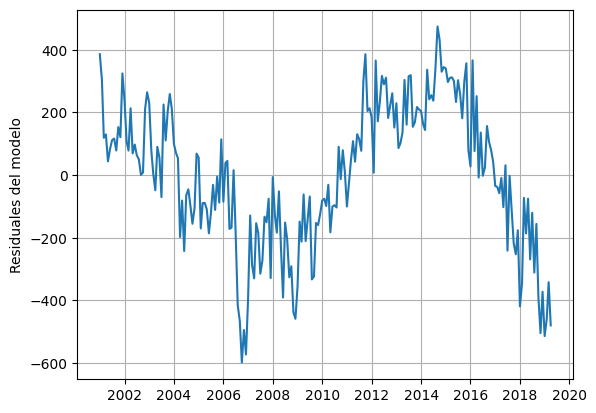

In [36]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

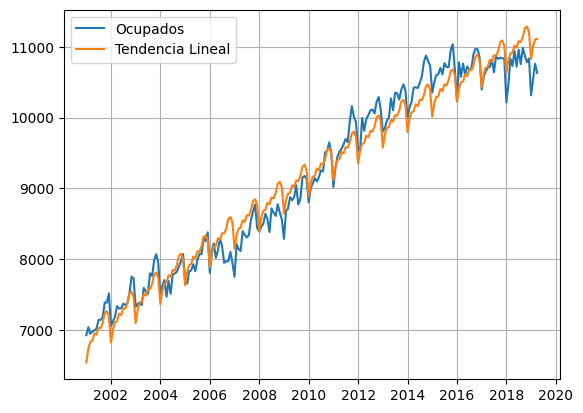

In [37]:
plt.plot(y,label="Ocupados")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [38]:
h=12
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,221.0,48841.0,0,0,0,1,0,0,0,0,0,0,0
1,1.0,222.0,49284.0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,223.0,49729.0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,224.0,50176.0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,225.0,50625.0,0,0,0,0,0,0,0,1,0,0,0
5,1.0,226.0,51076.0,0,0,0,0,0,0,0,0,1,0,0
6,1.0,227.0,51529.0,0,0,0,0,0,0,0,0,0,1,0
7,1.0,228.0,51984.0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,229.0,52441.0,0,0,0,0,0,0,0,0,0,0,0
9,1.0,230.0,52900.0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    11211.838909  10730.817019  11692.860800
2019-06-01    11184.654419  10703.336346  11665.972492
2019-07-01    11273.916096  10792.294026  11755.538167
2019-08-01    11261.729940  10779.796071  11743.663808
2019-09-01    11334.200450  10851.946998  11816.453902
2019-10-01    11457.262404  10974.681599  11939.843210
2019-11-01    11480.145192  10997.229279  11963.061106
2019-12-01    11399.891147  10916.632388  11883.149906
2020-01-01    11020.019684  10537.352504  11502.686864
2020-02-01    11208.750800  10725.721225  11691.780375
2020-03-01    11293.661337  10810.260810  11777.061864
2020-04-01    11302.182558  10818.402542  11785.962574


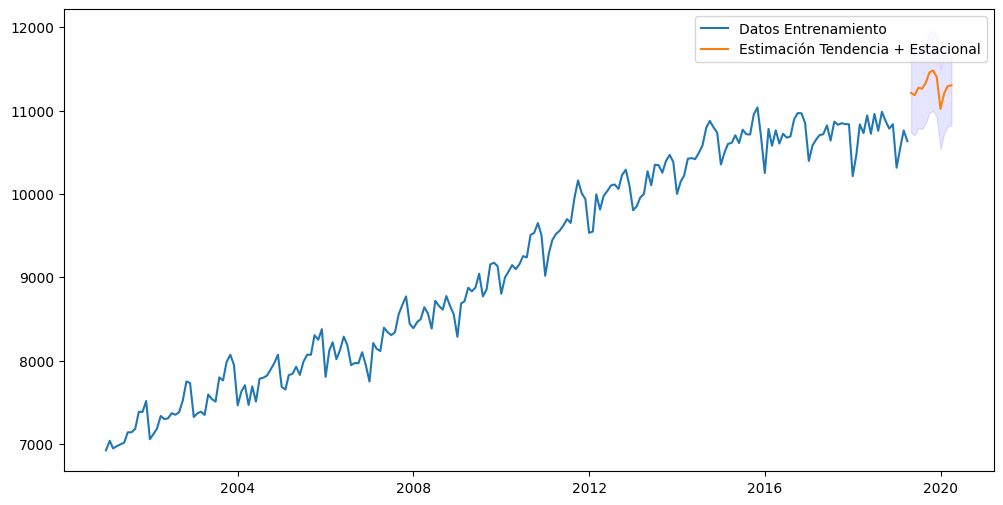

In [40]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

# Modelo cubico


In [41]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**3

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol3 = sm.OLS(y,X)
season_pol_3 = season_pol3.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          5.58e-148
Time:                        20:40:38   Log-Likelihood:                -1504.4
No. Observations:                 220   AIC:                             3037.
Df Residuals:                     206   BIC:                             3084.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6514.3526     69.120     94.247      0.0

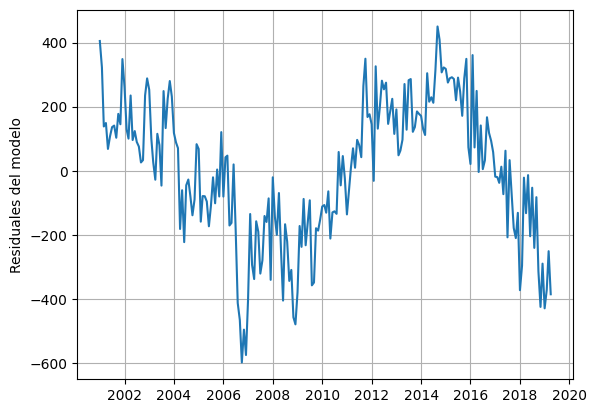

In [42]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_3.resid)
plt.grid()

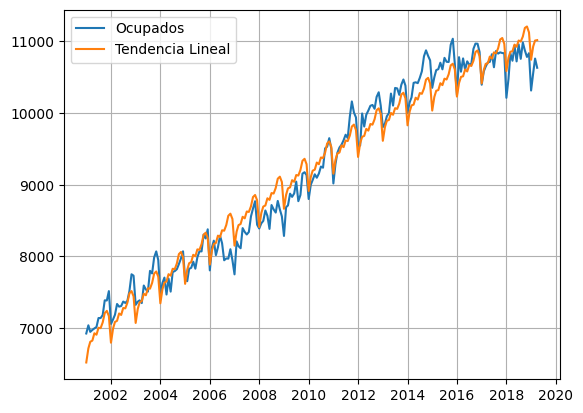

In [43]:
plt.plot(y,label="Ocupados")
plt.plot(season_pol_3.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [44]:
h=12
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,221.0,48841.0,0,0,0,1,0,0,0,0,0,0,0
1,1.0,222.0,49284.0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,223.0,49729.0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,224.0,50176.0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,225.0,50625.0,0,0,0,0,0,0,0,1,0,0,0
5,1.0,226.0,51076.0,0,0,0,0,0,0,0,0,1,0,0
6,1.0,227.0,51529.0,0,0,0,0,0,0,0,0,0,1,0
7,1.0,228.0,51984.0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,229.0,52441.0,0,0,0,0,0,0,0,0,0,0,0
9,1.0,230.0,52900.0,1,0,0,0,0,0,0,0,0,0,0


In [45]:
dt = season_pol_3.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    11900.404528  11409.679288  12391.129768
2019-06-01    11880.481970  11389.338209  12371.625732
2019-07-01    11977.053161  11485.482716  12468.623605
2019-08-01    11972.224542  11480.219110  12464.229974
2019-09-01    12052.101056  11559.652184  12544.549928
2019-10-01    12182.617922  11689.717010  12675.518834
2019-11-01    12213.004971  11719.643268  12706.366674
2019-12-01    12140.304979  11646.473581  12634.136377
2020-01-01    11769.095039  11273.967687  12264.222391
2020-02-01    11965.485366  11469.890141  12461.080590
2020-03-01    12058.103580  11562.031673  12554.175487
2020-04-01    12074.381386  11577.823837  12570.938935


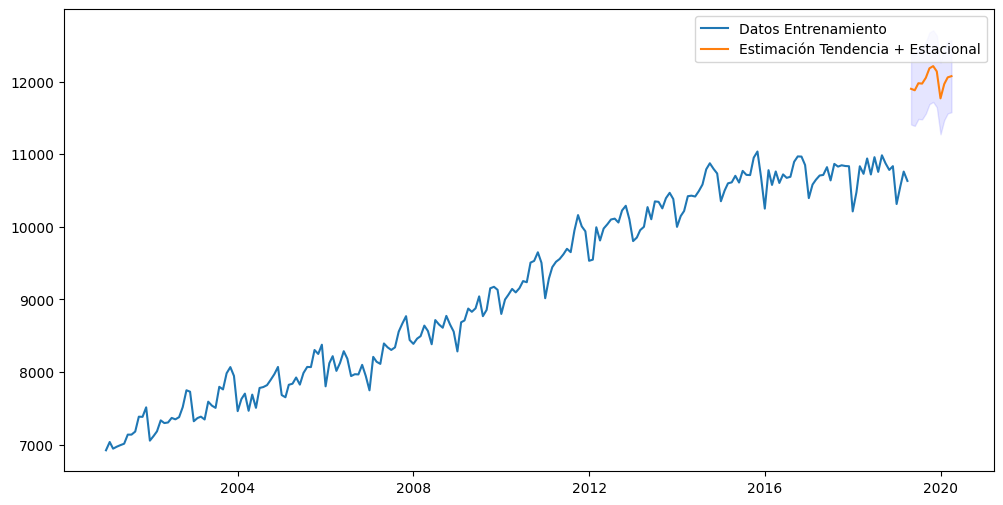

In [46]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()